# A Very Brief Intro to Natural Language Processing

## Regular expressions

The fastest way to find patterns in strings is to use a library that can match so-called regular expressions. In Python, it is the `re` library that does the trick, but regular expressions are also common in other languages, and the syntax remains almost identical in every case. 

You can even use regexp search and replace in most text editors, for example while editing LaTeX files, or code on your computer. `grep` and `sed` also understand regular expressions in the terminal. Thus, once mastered, regexps are going to appear in almost each and every one of your works or data cleaning. Below, some common everyday examples are shown, alongside with the Python usage.

As to learning the syntax, check out the first two links:

* This is a quite good introduction:
http://www.zytrax.com/tech/web/regex.htm

* This is a really good tutorial that shows how regular expressions match or do not match:
https://regexone.com/

* And this link covers Pythons regex library as a starter.
https://developers.google.com/edu/python/regular-expressions

### The `re` library in Python

In [1]:
# importing the library
import re

This is a hello world example for the `re` library.

In [2]:
re.findall('\w+','apple pear plum cherries')

['apple', 'pear', 'plum', 'cherries']

The file `robinson.txt` contains Defoe's famous novel downloaded from the website of the [Project Gutenberg](http://www.gutenberg.org). Let's count how many times the pronoun `the` appears in the novel!

In [3]:
robinson = open('robinson.txt').read()

In [4]:
len(re.findall('the',robinson))

20623

Let's extract possible names beginning with a capital `F` from the novel.We exclude words that are supposed to be at the beginning of a sentence.

In [5]:
# this is a find and replace command for strings
# arguments are old_pattern, new_pattern, string
# returns substituted string
robinson_no_newlines = re.sub('\n',' ',robinson)

Because of the above excluding conditions, we check the preceding two characters of the names. But we would only like to return the names themselves without the preceding characters. Therefore, we use group capturing by putting brackets around the desired parts `()`, which makes sure that `re.findall` only returns the matched groups, not the whole pattern. If we capture more than one group, the returned list would contain tuples.

In [6]:
set(re.findall('[^\.!\?" ] (F[a-z]+)',robinson_no_newlines))

{'Father',
 'February',
 'Fernand',
 'Finland',
 'Firma',
 'First',
 'Flanders',
 'Fontarabia',
 'Formosa',
 'Fowling',
 'France',
 'French',
 'Frenchman',
 'Friday',
 'Frozen',
 'Frye',
 'Fyal'}

### Some command line examples

Reformatting the output of `uniq -c`!

In [7]:
!cat random.txt | sed 's/ /\n/g' | sort -n | uniq -c | sed -e 's/^\s*//g' | sed -e 's/ /,/g' | head

45,0.00
101,0.01
103,0.02
104,0.03
109,0.04
85,0.05
101,0.06
97,0.07
99,0.08
107,0.09


Adding `0.` to floats smaller than `1`.

In [8]:
!cat sample.txt | sed -e 's/^\./0\./g'

# This is a sample file for illustration purposes.
# This is a comment line.
But this is not, it just happens to contain a '#'.
0.3
0.4
0.64
1.45
2.5


Excluding comment lines.

In [9]:
!cat sample.txt | grep -ve '^#'

But this is not, it just happens to contain a '#'.
.3
.4
.64
1.45
2.5


*Disclaimer: the following cells don't run here, but they all come from the bash history of the various computers I use in my work.*

Very real-world example: if you tend to forget about newline characters when dumping out streamlined `JSON` results from a program, this line breaks your one-liner output to multiple lines.

In [10]:
!cat gravity_res_big.json | sed -e "s/}{/}\n{/g" > gravity_res_big_formatted.json

cat: gravity_res_big.json: No such file or directory


Deleting numerical columns from a csv file, where the last column is a string, I forgot to exclude commas or weird characters from this last column on the output dump, I also forgot to put the string into quotation marks, but I'd like to have a look at it nevertheless.

In [11]:
!head illustration_boston_frequent_tweeters.csv | sed -e 's/\([-0-9\.]*,\)//g'

head: cannot open 'illustration_boston_frequent_tweeters.csv' for reading: No such file or directory


This used to be the head of the file:

## How to feed a text to the computer?

First of all, we want to decide what elements we want as building blocks. A common approach is to break the text down to words. But even this task is not that simple as it first seems. The next string contains an example message of Donald Trump from the Twitter social network.

Possible problems:
* lower and uppercase
* punctuation
* emojis
* character encoding
* named entity recognition...

In [12]:
trump_tweet = 'Having great meetings and discussions with my friend, President @EmmanuelMacron of France. We are in the midst of meetings on Iran, Syria and Trade. We will be holding a joint press conference shortly, here at the @WhiteHouse. 🇺🇸🇫🇷'

Does this work?

In [13]:
print(' '.join(re.findall('\w+',trump_tweet.lower())))

having great meetings and discussions with my friend president emmanuelmacron of france we are in the midst of meetings on iran syria and trade we will be holding a joint press conference shortly here at the whitehouse


## nltk

"NLTK is a leading platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum."

In [14]:
import nltk

Let's have a look at our former task.

In [15]:
print(' '.join(nltk.word_tokenize(trump_tweet.lower())))

having great meetings and discussions with my friend , president @ emmanuelmacron of france . we are in the midst of meetings on iran , syria and trade . we will be holding a joint press conference shortly , here at the @ whitehouse . 🇺🇸🇫🇷


Look for a good tweet tokenizer that has Twitter-specific regular expressions built-in either within `nltk` or outside!
http://www.nltk.org/api/nltk.tokenize.html

## Stemming

If we are interested in the core meaning, often we can throw away third person forms or plurals etc.

In [16]:
from nltk.stem import SnowballStemmer

snow = SnowballStemmer('english',ignore_stopwords=True)
for word in nltk.word_tokenize(trump_tweet.lower())[0:10]:
    print(word,'->',snow.stem(word))

having -> having
great -> great
meetings -> meet
and -> and
discussions -> discuss
with -> with
my -> my
friend -> friend
, -> ,
president -> presid


## Term-document matrix

A useful algebraic concept for representing a collection of texts is having a matrix. On this matrix, it is possible to try many concepts and methods from linear algebra, machine learning etc.

https://en.wikipedia.org/wiki/Document-term_matrix

Let us have a look at such a matrix on some Trump tweets again http://www.trumptwitterarchive.com/archive:

In [17]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

The file `corpus.txt` contains the president's tweets downloaded from the archive. It is a small collection of wikipedia articles fromt he disciplines of chemical physics (21 articles), experimental physics (24 articles), and computational biology (18 articles).

In [34]:
trumptweets = pd.read_csv('corpus.txt',header=None)
#trumptweets.dropna(subset=["text"],inplace=True)

Let's make an array counting the occurrence of words in each tweet!

In [37]:
c = CountVectorizer()
c.fit_transform(trumptweets.head(3)[0].tolist()).todense()

matrix([[0, 0, 0, ..., 0, 1, 0],
        [0, 0, 0, ..., 1, 0, 0],
        [1, 1, 1, ..., 0, 0, 1]], dtype=int64)

In [38]:
' '.join(c.get_feature_names())

'above absorption abundance accomplished according achieved act actual addition aggregate albert all allowing already also although american an analytical and anderson angular another any appear applicable application are around as atomic atoms available awarded ball based basis be because been being below between biological bonds both branch branches but by can carver case centre certain change characterizing chemical chemistry close common commonly compensate complete component components compounds conditions conduction confirm conformation conjunction connected consequently consists constant controlled corresponds could coupled coupling cross currently decreases demonstrated demonstrating derived described determine did different differs dimensional dipole discovery distances do due each early effect effectively electron electronic electrons energy engineering enhanced entire equations essentially etc examined excitation exhibit experiment experimental experimentally explains explan

First, we have to create our own tokenizer, because the built-in one leaves us with punctuation marks and numbers.

In [39]:
tt = nltk.tokenize.TweetTokenizer(preserve_case=True,strip_handles=True,reduce_len=True)
ss = nltk.stem.SnowballStemmer('english')

In [40]:
def custom_tokenizer(text):
    """
    The input is the string to tokenize.
    
    The output is the list of desired words.
    """
    words = tt.tokenize(text)
    return [ss.stem(w) for w in words if re.match('^[a-z]+$',w)!=None]

Creating the TF-IDF matrix.

In [41]:
c = TfidfVectorizer(tokenizer=custom_tokenizer,stop_words='english',min_df=5,norm='l2')
# trumptweets.text.str.contains('Clinton')
X = c.fit_transform(trumptweets[0])
print(X.shape)
words = c.get_feature_names()

/home/bokanyie/.anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


(63, 579)


Fitting an LDA model to it.

In [42]:
l = LatentDirichletAllocation(n_components=3,n_jobs=-1)
T = l.fit_transform(X)
W = l.components_

No handles with labels found to put in legend.


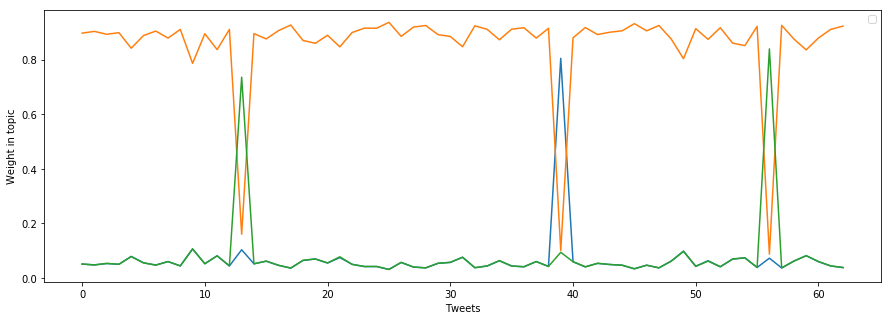

In [43]:
plt.figure(figsize=(15,5))
plt.plot(T,markersize=1)
plt.xlabel('Tweets')
plt.ylabel('Weight in topic')
plt.legend()
plt.show()

No handles with labels found to put in legend.


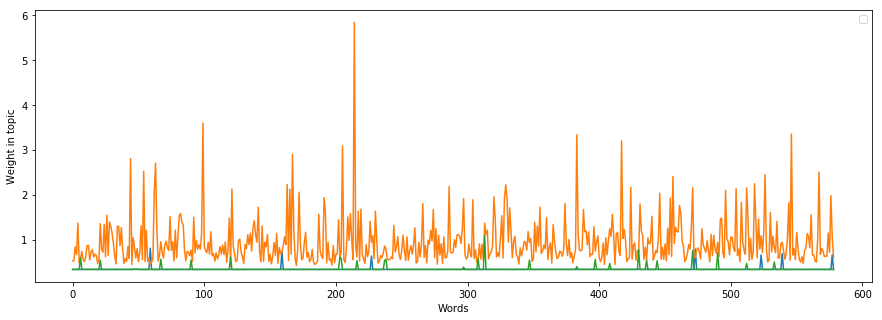

In [44]:
plt.figure(figsize=(15,5))
plt.plot(W.T,'-',markersize=1)
plt.xlabel('Words')
plt.ylabel('Weight in topic')
plt.legend()
plt.show()

In [45]:
for i,line in enumerate(W):
    print("Topic "+str(i)+": ",end="")
    ind = np.argsort(line)[0:20]
    for elem in ind:
        print(words[elem]+", ",end="")
    print("\n")

Topic 0: employ, lack, goal, prior, opportun, key, attempt, futur, progress, genom, varieti, accuraci, avoid, data, network, demand, event, necessarili, fold, error, 

Topic 1: d, employ, extent, begin, progress, attempt, everi, prior, key, necessarili, appear, discuss, demand, lack, aris, varieti, aid, divers, futur, opportun, 

Topic 2: lack, employ, goal, opportun, prior, key, futur, attempt, progress, accuraci, varieti, genom, avoid, data, demand, event, network, fold, better, error, 



## Other questions

What to do when the texts do not have the same length? How to exclude not relevant words? How to make a weighting scheme for our purposes?

How to deal with the 'timeseries' nature of texts? What inputs do neural networks expect?